# Building a neural network to classify happy and sad faces

Step 1: Install Dependencies

In [1]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      1.4.0
anyio                        3.5.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        22.1.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       4.1.0
Bottleneck                   1.3.5
cachetools                   5.3.0
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.0.1
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.5
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    0.8.3
fastjsonschema               2.16.2
flatbuffers                  23.3.3
font

In [2]:
# Verifying GPU 
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Step 2: Import dependencies

In [3]:
import tensorflow as tf
import os

Main uses of OS lib:
os.path.join and os.listdir 


In [4]:
# To prevent an OOM error (Out of memory) Error, which occurs because of tf using all of the available ram
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    # This basically tells the GPU to only consume that amount of memory that it needs

Step 3: Remove Dodgy Images (corrupted/wrong extension)

In [5]:
# !pip install opencv-python

In [6]:
import cv2
import imghdr #allows us to check file extensions

In [7]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [8]:
os.listdir(data_dir)

['Happy_people', 'Sad_people']

In [9]:
for dir in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, dir)):
        image_path = os.path.join(data_dir, dir, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list --> {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with {}".format(image_path))

# Load Data

In [10]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [12]:
data = tf.keras.utils.image_dataset_from_directory('Data') # allows us to create a pipeline

Found 182 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator() #allows us to access the pipeline

In [14]:
batch = data_iterator.next()

In [15]:
print(batch[0].shape, batch[1])
# batch[0] is the set of images
# batch[1] is the set of labels

(32, 256, 256, 3) [0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1]


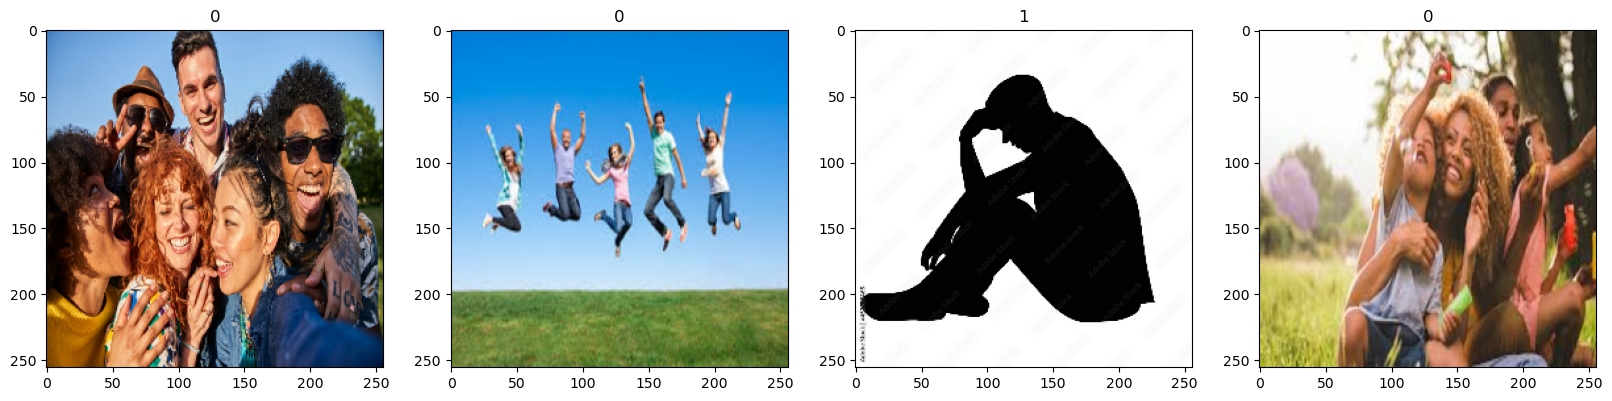

In [16]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# this tells that 0 is happy and 1 is sad

# Preprocess Data

In [17]:
data = data.map(lambda x,y : (x/255, y))

In [18]:
data.as_numpy_iterator().next()[0]

array([[[[3.92156886e-03, 0.00000000e+00, 1.25490203e-01],
         [3.92156886e-03, 0.00000000e+00, 1.25490203e-01],
         [3.92156886e-03, 0.00000000e+00, 1.25490203e-01],
         ...,
         [3.92156886e-03, 0.00000000e+00, 1.25490203e-01],
         [3.92156886e-03, 0.00000000e+00, 1.25490203e-01],
         [3.92156886e-03, 0.00000000e+00, 1.25490203e-01]],

        [[3.92156886e-03, 0.00000000e+00, 1.25490203e-01],
         [3.92156886e-03, 0.00000000e+00, 1.25490203e-01],
         [3.92156886e-03, 0.00000000e+00, 1.25490203e-01],
         ...,
         [3.92156886e-03, 0.00000000e+00, 1.25490203e-01],
         [3.92156886e-03, 0.00000000e+00, 1.25490203e-01],
         [3.92156886e-03, 0.00000000e+00, 1.25490203e-01]],

        [[3.92156886e-03, 0.00000000e+00, 1.25490203e-01],
         [3.92156886e-03, 0.00000000e+00, 1.25490203e-01],
         [3.92156886e-03, 0.00000000e+00, 1.25490203e-01],
         ...,
         [3.92156886e-03, 0.00000000e+00, 1.25490203e-01],
         [

# Split Data

In [19]:
len(data)

6

In [20]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = len(data) - train_size - val_size

In [21]:
print(train_size, val_size, test_size)

4 1 1


In [22]:
# Our data is already shuffled. If it hadn't been shuffled, we would have to shuffle it
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [23]:
print(len(train), len(test), len(val))

4 1 1


# Deep Model

In [24]:
# Using the keras sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
# One way to make the layers: model = Sequential([Conv2D(), ])
model = Sequential()

In [26]:
# adding conv and max pooling layer
model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

# adding conv and max pooling layer
model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

# adding conv and max pooling layer
model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [27]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train the model

In [30]:
import os
os.makedirs("logs")
# Saving our model at a particular check point or to do some specific logging

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs')
#A callback's primary purpose is to execute code in response to an event, which in this case is to write some information

In [32]:
hist = model.fit(train, epochs = 20, validation_data=val, callbacks = [tensorboard_callback])

Epoch 1/20


4/4 [==============================] - 7s 327ms/step - loss: 1.0455 - accuracy: 0.6172 - val_loss: 0.9647 - val_accuracy: 0.4062
Epoch 2/20
4/4 [==============================] - 2s 283ms/step - loss: 0.7486 - accuracy: 0.4844 - val_loss: 0.5811 - val_accuracy: 0.6562
Epoch 3/20
4/4 [==============================] - 2s 289ms/step - loss: 0.6057 - accuracy: 0.6250 - val_loss: 0.5618 - val_accuracy: 0.6250
Epoch 4/20
4/4 [==============================] - 2s 301ms/step - loss: 0.5722 - accuracy: 0.6875 - val_loss: 0.5228 - val_accuracy: 0.8750
Epoch 5/20
4/4 [==============================] - 2s 285ms/step - loss: 0.5341 - accuracy: 0.7344 - val_loss: 0.5174 - val_accuracy: 0.6875
Epoch 6/20
4/4 [==============================] - 2s 279ms/step - loss: 0.4565 - accuracy: 0.8750 - val_loss: 0.3993 - val_accuracy: 0.9062
Epoch 7/20
4/4 [==============================] - 2s 294ms/step - loss: 0.3469 - accuracy: 0.8516 - val_loss: 0.2750 - val_accuracy: 0.9375
Epoch 8/20
4/4 [===============

In [33]:
hist.history

{'loss': [1.045548677444458,
  0.7486071586608887,
  0.6056759357452393,
  0.5721778869628906,
  0.53407222032547,
  0.45651447772979736,
  0.3469040095806122,
  0.338664174079895,
  0.20028001070022583,
  0.19561713933944702,
  0.12737911939620972,
  0.06533034890890121,
  0.0680454820394516,
  0.06821257621049881,
  0.11918144673109055,
  0.10622213780879974,
  0.07582481950521469,
  0.07831646502017975,
  0.03950056433677673,
  0.027427634224295616],
 'accuracy': [0.6171875,
  0.484375,
  0.625,
  0.6875,
  0.734375,
  0.875,
  0.8515625,
  0.890625,
  0.953125,
  0.9609375,
  0.9765625,
  0.984375,
  0.984375,
  0.9921875,
  0.9765625,
  0.984375,
  0.9765625,
  0.9609375,
  0.9921875,
  1.0],
 'val_loss': [0.9646874666213989,
  0.5810821056365967,
  0.5617998242378235,
  0.5227773189544678,
  0.5174102783203125,
  0.39925524592399597,
  0.27503132820129395,
  0.19137528538703918,
  0.17745664715766907,
  0.09734183549880981,
  0.05556099861860275,
  0.04807864502072334,
  0.050383

# Plot Performance

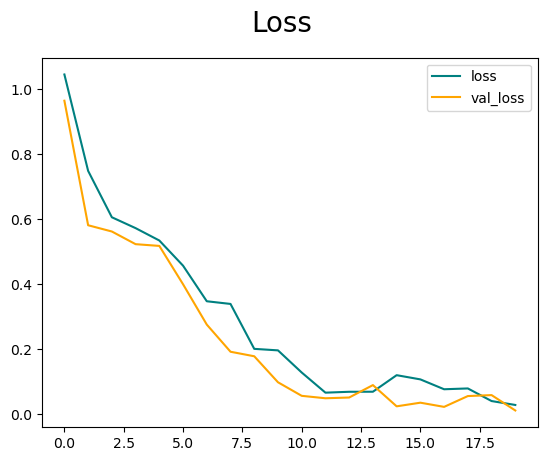

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper right')
plt.show()

# Evaluate Performance

In [35]:
# we use the metrics API in keras
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 354ms/step


In [38]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 1.0 1.0


In [39]:
import cv2

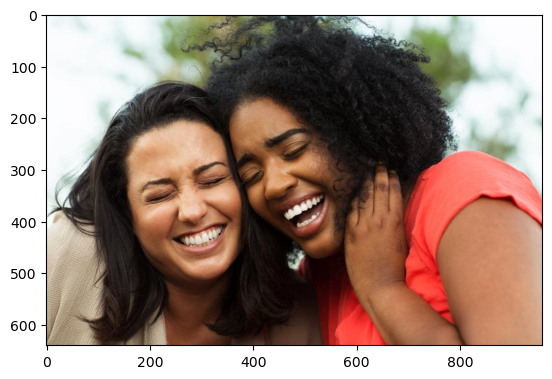

In [40]:
img = cv2.imread("C:\\Users\\chara\\OneDrive\\Desktop\\Chirag_files\\Me\\Programs\\Image_Classification\\Data\\Happy_people\\960x0.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

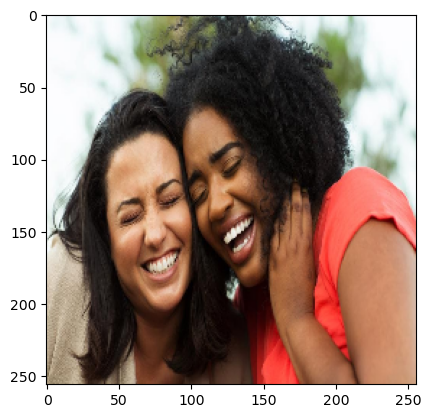

In [41]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))
# Using np.expand, we are putting the nunmpy array into a list by expanding its dimension. The new dimension is added along the axis 0
# This is done as the predict method expects to get a batch

1/1 [==============================] - 0s 79ms/step


In [43]:
print(yhat)

[[0.00032268]]


# Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('model', 'image_classifier.h5'))


In [46]:
new_model = load_model(os.path.join('model', 'image_classifier.h5'))